In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [33]:
path = '../data/data_reg/wine_train.csv'
df = pd.read_csv(path)

In [34]:
df.head()

,wine_ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,target
0,2137,7.2,0.16,0.26,7.1,0.054,41.0,224.0,0.99660,3.38,0.55,10.1,0,5
1,2652,7.3,0.22,0.31,2.3,0.018,45.0,80.0,0.98936,3.06,0.34,12.9,0,7
2,1544,8.9,0.13,0.49,1.0,0.028,6.0,24.0,0.99260,2.91,0.32,9.9,0,5
3,3447,6.0,0.17,0.29,9.7,0.044,33.0,98.0,0.99536,3.12,0.36,9.2,0,6
4,1067,7.5,0.19,0.34,2.6,0.037,33.0,125.0,0.99230,3.10,0.49,11.1,0,7


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_ID               4547 non-null   int64  
 1   fixed acidity         4547 non-null   float64
 2   volatile acidity      4547 non-null   float64
 3   citric acid           4547 non-null   float64
 4   residual sugar        4547 non-null   float64
 5   chlorides             4547 non-null   float64
 6   free sulfur dioxide   4547 non-null   float64
 7   total sulfur dioxide  4547 non-null   float64
 8   density               4547 non-null   float64
 9   pH                    4547 non-null   float64
 10  sulphates             4547 non-null   float64
 11  alcohol               4547 non-null   float64
 12  wine_type             4547 non-null   int64  
 13  target                4547 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 497.5 KB


In [36]:
print(df.shape)
print("--------------------")
print(df.columns)
print("--------------------")
print(df.describe())

(4547, 14)
--------------------
Index(['wine_ID', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'wine_type', 'target'],
      dtype='object')
--------------------
           wine_ID  fixed acidity  volatile acidity  citric acid  \
count  4547.000000    4547.000000       4547.000000  4547.000000   
mean   3249.257313       7.235364          0.340110     0.318155   
std    1882.272944       1.319966          0.166643     0.142942   
min       0.000000       3.800000          0.080000     0.000000   
25%    1618.500000       6.400000          0.230000     0.250000   
50%    3227.000000       7.000000          0.290000     0.310000   
75%    4896.500000       7.700000          0.400000     0.390000   
max    6495.000000      15.600000          1.580000     1.000000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide 

In [37]:
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                      'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [38]:
df['target'].value_counts()

target
6    1997
5    1475
7     761
4     151
8     135
3      23
9       5
Name: count, dtype: int64

In [39]:
df.isnull().sum()

wine_ID                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_type               0
target                  0
dtype: int64

In [40]:
df.drop('wine_ID', axis=1, inplace=True)

<Axes: >

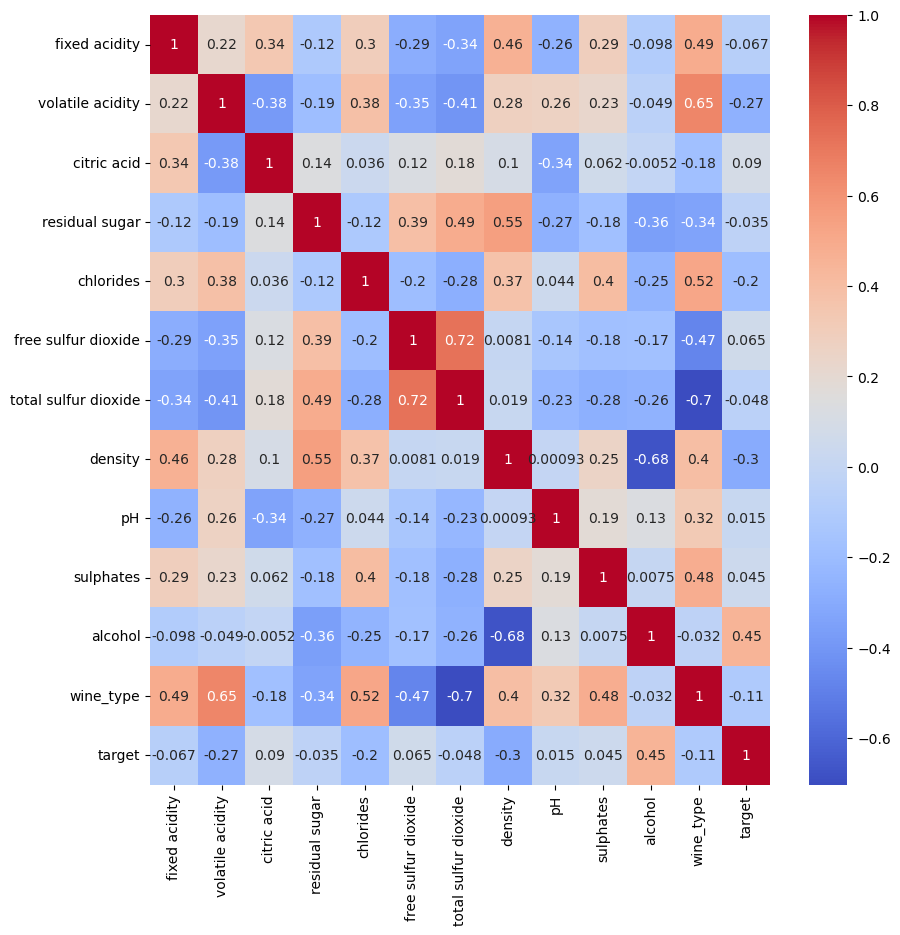

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [42]:
X = df.drop('target', axis=1)
y = df['target']

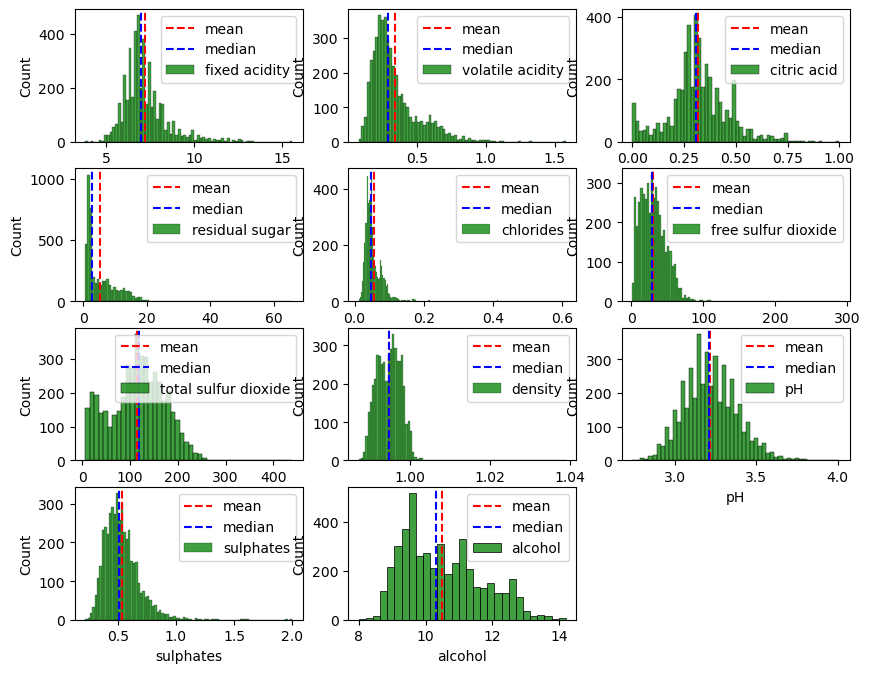

In [43]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(X[numerical_features].columns)):
    fig.add_subplot(5, 3, i+1)
    sns.histplot(X[numerical_features].iloc[:, i], color='green', label=X.columns[i])
    # show the mean and median
    plt.axvline(X[numerical_features].iloc[:, i].mean(), linestyle='dashed', color='red', label='mean')
    plt.axvline(X[numerical_features].iloc[:, i].median(), linestyle='dashed', color='blue', label='median')
    plt.legend()

(array([  23.,    0.,    0.,  151.,    0.,    0., 1475.,    0.,    0.,
           0., 1997.,    0.,    0.,  761.,    0.,    0.,  135.,    0.,
           0.,    5.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6,
        6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <BarContainer object of 20 artists>)

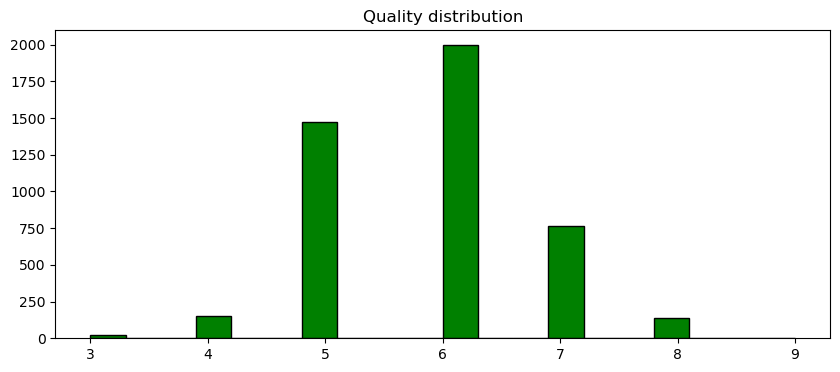

In [44]:
plt.figure(figsize=(10, 4))
plt.title('Quality distribution')
plt.hist(y, bins=20, color='green', edgecolor='black')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(r2_score(y_test, y_pred))

0.31196724892924044


In [47]:
res = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [48]:
res.to_csv('../résultats_models/regression/linear.csv')

## CatBoost

In [49]:
from catboost import CatBoostRegressor, Pool

In [50]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)
model = CatBoostRegressor(iterations=10000, depth=10, learning_rate=0.1, loss_function='RMSE', eval_metric='R2', random_seed=42)
model.fit(train_pool, eval_set=test_pool, verbose=1)

0:	learn: 0.0545867	test: 0.0503175	best: 0.0503175 (0)	total: 5.31ms	remaining: 53.1s
1:	learn: 0.1044109	test: 0.0959842	best: 0.0959842 (1)	total: 10.2ms	remaining: 50.8s
2:	learn: 0.1464717	test: 0.1336854	best: 0.1336854 (2)	total: 22.6ms	remaining: 1m 15s
3:	learn: 0.1867317	test: 0.1658116	best: 0.1658116 (3)	total: 33.5ms	remaining: 1m 23s
4:	learn: 0.2170464	test: 0.1929648	best: 0.1929648 (4)	total: 41.6ms	remaining: 1m 23s
5:	learn: 0.2463134	test: 0.2164296	best: 0.2164296 (5)	total: 53.3ms	remaining: 1m 28s
6:	learn: 0.2733208	test: 0.2377824	best: 0.2377824 (6)	total: 58.3ms	remaining: 1m 23s
7:	learn: 0.2947302	test: 0.2569610	best: 0.2569610 (7)	total: 63.7ms	remaining: 1m 19s
8:	learn: 0.3136068	test: 0.2715906	best: 0.2715906 (8)	total: 71ms	remaining: 1m 18s
9:	learn: 0.3321865	test: 0.2872916	best: 0.2872916 (9)	total: 75.7ms	remaining: 1m 15s
10:	learn: 0.3477492	test: 0.2989989	best: 0.2989989 (10)	total: 80.4ms	remaining: 1m 13s
11:	learn: 0.3609759	test: 0.30990

In [52]:
preds = model.predict(X_test)

print(r2_score(y_test, preds))

new_res = pd.DataFrame({'y_test': y_test, 'y_pred': preds})

new_res.to_csv('../résultats_models/regression/catboost.csv')

0.4904617814714384


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = CatBoostRegressor(iterations=10000, depth=10, learning_rate=0.1, loss_function='RMSE', eval_metric='R2', random_seed=42)
model.fit(X_train_scaled, y_train, eval_set=(X_test_scaled, y_test), verbose=1)

y_pred = model.predict(X_test_scaled)

print(r2_score(y_test, y_pred))

new_res = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

new_res.to_csv('../résultats_models/regression/catboost_scaled.csv')


0:	learn: 0.0545867	test: 0.0503175	best: 0.0503175 (0)	total: 5.42ms	remaining: 54.2s
1:	learn: 0.1044109	test: 0.0959842	best: 0.0959842 (1)	total: 10.2ms	remaining: 50.9s
2:	learn: 0.1464717	test: 0.1336854	best: 0.1336854 (2)	total: 14.8ms	remaining: 49.4s
3:	learn: 0.1867317	test: 0.1658116	best: 0.1658116 (3)	total: 19.7ms	remaining: 49.2s
4:	learn: 0.2170464	test: 0.1929648	best: 0.1929648 (4)	total: 23.9ms	remaining: 47.8s
5:	learn: 0.2463134	test: 0.2163484	best: 0.2163484 (5)	total: 28.1ms	remaining: 46.8s
6:	learn: 0.2733208	test: 0.2377011	best: 0.2377011 (6)	total: 32.7ms	remaining: 46.7s
7:	learn: 0.2947302	test: 0.2568800	best: 0.2568800 (7)	total: 37.1ms	remaining: 46.3s
8:	learn: 0.3136068	test: 0.2715099	best: 0.2715099 (8)	total: 41.4ms	remaining: 46s
9:	learn: 0.3321865	test: 0.2871921	best: 0.2871921 (9)	total: 45.6ms	remaining: 45.5s
10:	learn: 0.3477492	test: 0.2988994	best: 0.2988994 (10)	total: 49.8ms	remaining: 45.2s
11:	learn: 0.3609759	test: 0.3098071	best: 

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}

grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

preds = grid.predict(X_test)

print(r2_score(y_test, preds))

new_res = pd.DataFrame({'y_test': y_test, 'y_pred': preds})

new_res.to_csv('../résultats_models/regression/random_forest.csv')

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.42785770231728576
0.4925929105861855


In [58]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.42785770231728576


## submission CatBoost

In [59]:
test_path = '../data/data_reg/wine_test.csv'
test_df = pd.read_csv(test_path)

In [60]:
X_train = df.drop('target', axis=1)
y_train = df['target']
X_test = test_df.drop('wine_ID', axis=1)
test_id = test_df['wine_ID']

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)

(4547, 12)
(1950, 12)
(4547,)


In [31]:
# catboost

model = CatBoostRegressor(iterations=1000, depth=10, learning_rate=0.1, loss_function='RMSE', eval_metric='R2', random_seed=42)
model.fit(X_train_scaled, y_train, verbose=1)

y_pred = model.predict(X_test_scaled)

res = pd.DataFrame({'wine_ID': test_id, 'quality': y_pred})
res.to_csv('../catboost.csv', index=False)

0:	learn: 0.0567036	total: 5.5ms	remaining: 5.5s
1:	learn: 0.1040509	total: 7.65ms	remaining: 3.82s
2:	learn: 0.1449590	total: 12.2ms	remaining: 4.07s
3:	learn: 0.1809179	total: 17ms	remaining: 4.23s
4:	learn: 0.2149609	total: 21.9ms	remaining: 4.37s
5:	learn: 0.2440652	total: 26.9ms	remaining: 4.46s
6:	learn: 0.2647284	total: 31.3ms	remaining: 4.44s
7:	learn: 0.2871080	total: 35.9ms	remaining: 4.45s
8:	learn: 0.3073255	total: 40.2ms	remaining: 4.42s
9:	learn: 0.3263475	total: 44.3ms	remaining: 4.39s
10:	learn: 0.3434637	total: 48.5ms	remaining: 4.36s
11:	learn: 0.3590958	total: 52.8ms	remaining: 4.34s
12:	learn: 0.3736829	total: 57.5ms	remaining: 4.37s
13:	learn: 0.3884004	total: 62.3ms	remaining: 4.38s
14:	learn: 0.3991938	total: 66.7ms	remaining: 4.38s
15:	learn: 0.4119119	total: 71.2ms	remaining: 4.38s
16:	learn: 0.4218701	total: 75.6ms	remaining: 4.37s
17:	learn: 0.4313632	total: 79.9ms	remaining: 4.36s
18:	learn: 0.4389357	total: 84.2ms	remaining: 4.34s
19:	learn: 0.4484313	total

In [8]:
print(X_train.shape, y_train.shape, X_test.shape, test_id.shape)

(4547, 13) (4547,) (1950, 12) (1950,)


## submission Random Forest

In [61]:
test_path = '../data/data_reg/wine_test.csv'
test_df = pd.read_csv(test_path)

In [62]:
X_train = df.drop('target', axis=1)
y_train = df['target']
X_test = test_df.drop('wine_ID', axis=1)
test_id = test_df['wine_ID']

In [63]:
model = RandomForestRegressor(**grid.best_params_, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

res = pd.DataFrame({'wine_ID': test_id, 'quality': y_pred})
res.to_csv('../random_forest.csv', index=False)